In [2]:
import requests
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [106]:
import seaborn as sns

In [4]:
load_crime_data = Path("Crimes_-_2001_to_Present.csv")


In [5]:
crime_data_df = pd.read_csv(load_crime_data)

In [6]:
crime_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,13236447,JG455224,10/08/2023 12:00:00 AM,037XX W 55TH PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,"(41.792378153, -87.716798658)",35.0,21867.0,60.0,774.0,6.0,58.0,13.0,129.0,23.0
1,13237594,JG455703,10/08/2023 12:00:00 AM,074XX S COLES AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,"(41.76034157, -87.559070771)",43.0,22538.0,39.0,421.0,37.0,24.0,18.0,213.0,5.0
2,13236495,JG455285,10/08/2023 12:00:00 AM,082XX S VERNON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,"(41.744770536, -87.613538057)",31.0,21546.0,40.0,11.0,32.0,61.0,20.0,235.0,4.0
3,13237202,JG456104,10/08/2023 12:00:00 AM,036XX N LAKEWOOD AVE,0630,BURGLARY,ATTEMPT FORCIBLE ENTRY,APARTMENT,False,False,...,"(41.947618277, -87.661610299)",38.0,21186.0,57.0,728.0,25.0,53.0,5.0,12.0,44.0
4,13236450,JG455180,10/07/2023 11:59:00 PM,063XX S TROY ST,1020,ARSON,BY FIRE,APARTMENT,False,False,...,"(41.778293095, -87.701898173)",44.0,21867.0,64.0,319.0,31.0,58.0,13.0,276.0,15.0


In [7]:
unique_crime=crime_data_df['ID'].nunique()
unique_crime


2404967

In [8]:
unique_locations = crime_data_df['Location Description'].nunique()
unique_locations

142

Where do the crimes typically take place and what is most common crime/location combination?


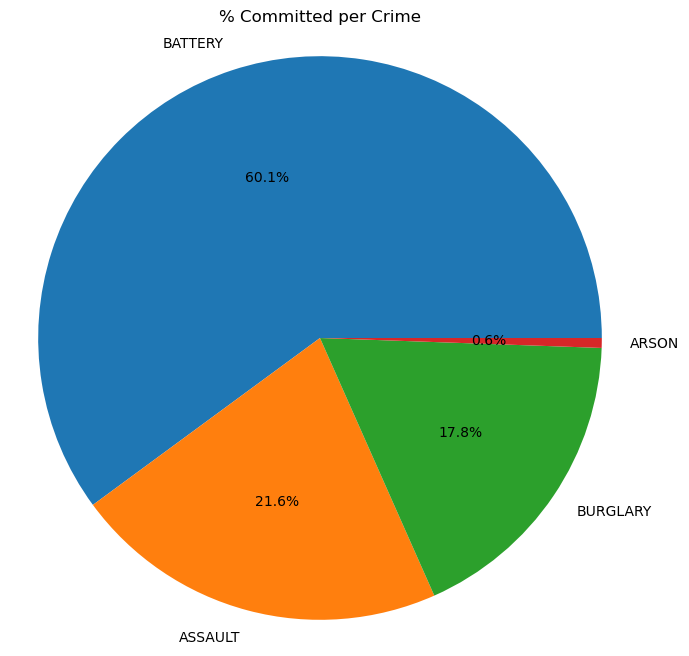

In [9]:
cc = crime_data_df['Primary Type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(cc, labels=cc.index, autopct='%1.1f%%')
plt.title("% Committed per Crime")
plt.axis('equal')
file_name = "Crime_Count_Per_Crime.txt"
with open(file_name, "w") as file:
    for crime, count in cc.items():
         file.write(f"Crime:  {crime}, Count: {count} ")
plt.savefig("Output Data/PiePercenCrimeCountt.png")
plt.show()

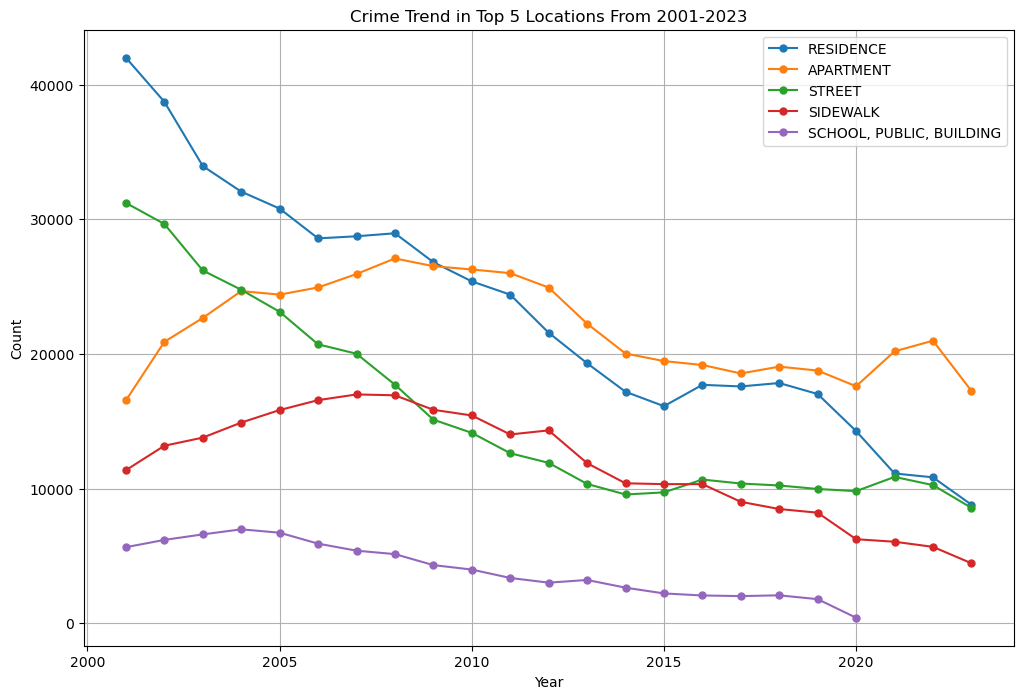

In [26]:
# Extract the year from the 'Date' column
top_5_locations = crime_data_df['Location Description'].value_counts().nlargest(5).index

# Create a line chart for each of the top 5 locations
plt.figure(figsize=(12, 8))

for location in top_5_locations:
    location_data = crime_data_df[crime_data_df['Location Description'] == location]
    location_counts = location_data.groupby('Year').size()
    
    plt.plot(location_counts.index, location_counts, label=location, marker='o', markersize=5)

plt.title('Crime Trend in Top 5 Locations From 2001-2023')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()









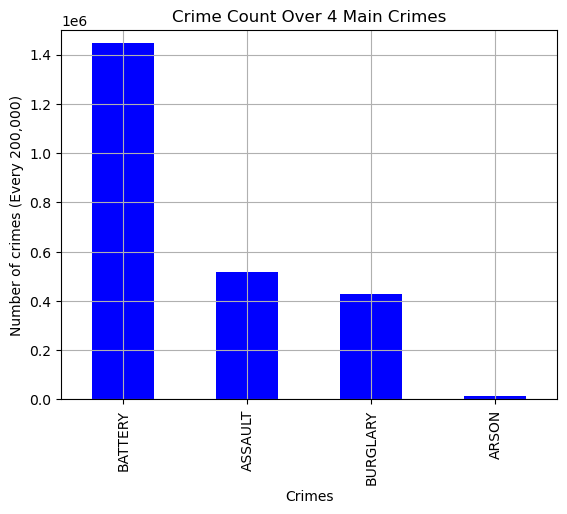

Crime:  BATTERY, Count: 1445060 
Crime:  ASSAULT, Count: 518529 
Crime:  BURGLARY, Count: 427866 
Crime:  ARSON, Count: 13512 


In [31]:
# Generate a bar plot showing the total number for each crime
cc = crime_data_df['Primary Type'].value_counts()
crime_count_chart = cc.plot(kind='bar', color='b')
plt.title("Crime Count Over 4 Main Crimes")
plt.xlabel("Crimes")
plt.ylabel("Number of crimes (Every 200,000)")
top_five = crime_data_df['Location Description'].value_counts().nlargest(5)



plt.ylim(0,1500000)
plt.grid()
plt.savefig("Output Data/BarChartCrimeCount.png")
plt.show()

for crime, count in cc.items():
    print(f"Crime:  {crime}, Count: {count} ")

In [48]:
most_frequent_location = crime_data_df['Location Description'].value_counts().idxmax
most_frequent_location

<bound method Series.idxmax of Location Description
RESIDENCE                                          529659
APARTMENT                                          504073
STREET                                             357434
SIDEWALK                                           270114
SCHOOL, PUBLIC, BUILDING                            79531
                                                    ...  
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS         4
VEHICLE-COMMERCIAL - TROLLEY BUS                        3
VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS            2
FARM                                                    2
HORSE STABLE                                            1
Name: count, Length: 142, dtype: int64>

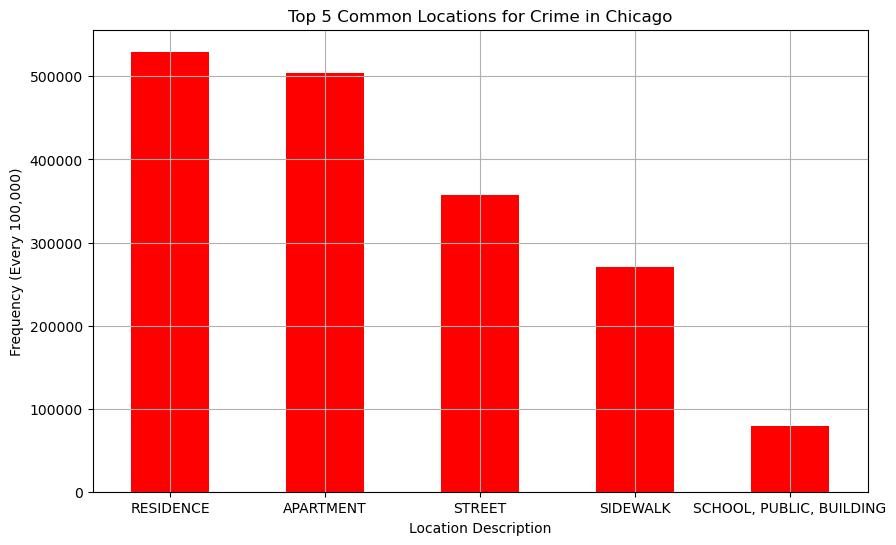

Location: RESIDENCE, Crime Count: 529659 
Location: APARTMENT, Crime Count: 504073 
Location: STREET, Crime Count: 357434 
Location: SIDEWALK, Crime Count: 270114 
Location: SCHOOL, PUBLIC, BUILDING, Crime Count: 79531 


In [28]:
top_five = crime_data_df['Location Description'].value_counts().nlargest(5)
file_name_2 = "Crime Per Top 5 Locations"
with open(file_name_2, 'w') as file:
    for location, count in top_five.items():
        file.write(f"Location: {location}, Crime Count: {count} ")


#Bar Chart Setup
plt.figure(figsize=(10, 6))
crime_count_bar = top_five.plot(kind='bar', color = 'r')
plt.xticks(rotation=0)
plt.ylabel('Frequency (Every 100,000)')
plt.title('Top 5 Common Locations for Crime in Chicago')
plt.savefig("Output Data/Top5LocationsBarChart.png")
plt.grid()
plt.show()

for location, count in top_five.items():
    print(f"Location: {location}, Crime Count: {count} ")


This bar chart shows the top 5 (out of 142) most common general locations for crime in Chicago. The chart shows 'Residence' with the highest level at around 550,000 crimes. Once again a for loop was created to print out in a text file ('Crime per Top 5 Locations') the exact crime count for each of the top 5 locations. 

Location Description: APARTMENT, Battery Crime Count: 306046
Location Description: RESIDENCE, Battery Crime Count: 297136
Location Description: STREET, Battery Crime Count: 249234
Location Description: SIDEWALK, Battery Crime Count: 204853
Location Description: SCHOOL, PUBLIC, BUILDING, Battery Crime Count: 51517


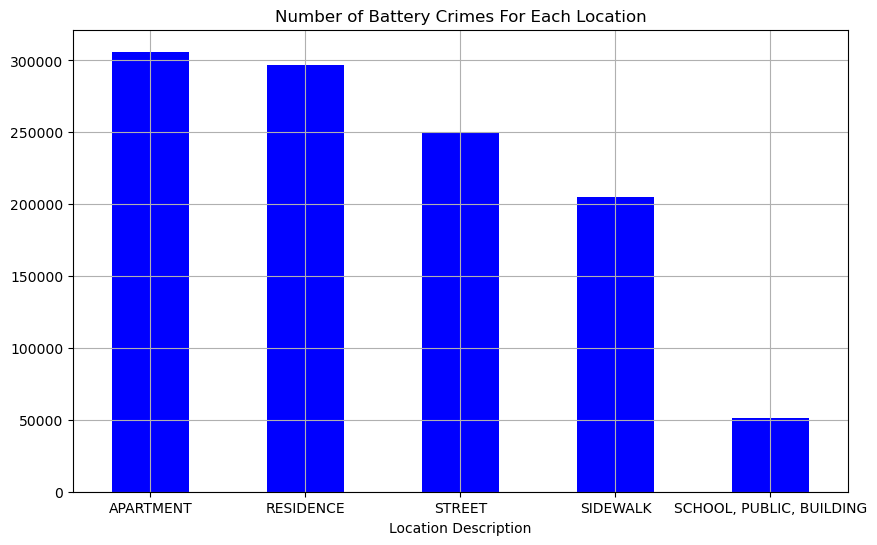

In [30]:
battery_crimes = crime_data_df[crime_data_df['Primary Type'] == 'BATTERY']
top_five_2 = battery_crimes['Location Description'].value_counts().nlargest(5)

for location, count in top_five_2.items():
    print(f"Location Description: {location}, Battery Crime Count: {count}")

#Bar Chart
plt.figure(figsize=(10,6))
top_five_2.plot(kind='bar', color='b')
plt.title('Number of Battery Crimes For Each Location')
plt.xticks(rotation=0)
plt.savefig("Output Data/BatteryTop5Locations.png")

plt.grid()
plt.show()




In [105]:
file_name_3 = "Battery Crime Each Location"
with open(file_name_3, 'w') as file:
    for location, count in top_five_2.items():
        file.write(f"Location: {location}, Crime Count: {count} ")

Analysis and Hypothesis

Hypothesis:

Pie Chart:

Crime Count Bar Chart:

Top 5 Locations for Crime Bar Chart:

Batter Crimes for Each Location Bar Chart:

Crime Trend for Locations Line Graph:



The final bar chart is a result of all the data and previous analysis collected. The data indicated that battery was the highest count of crime among the 5 crimes researched. A bar chart was then created to identify the order of most common to least common locations for battery to occur among the top 5 locations for crime in Chicago. The results show that apartments have the highest count of battery related crimes. To answer the question of what is the most common crime/location combination, this bar chart gives the final answer indicating battery/apartments are the most common combination with a little over 300,000 battery reports.